In [ ]:
%reset -f
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import griddata
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt
import warnings

(i)
The standard error estimated from the jackknife estimator is:  0.05822858855212752


(ii)


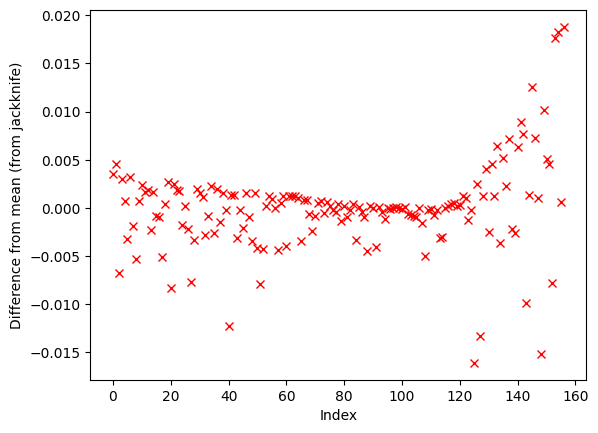

The plot shows that the observations making a huge contribution to the standard error of our jackknife estimator 
are the ones with the largest index, which corresponds to older patients.


(iii)
This is essentially the algorithm for the non-parametric bootstrap method that we have done in HW1, 
which I will use that algorithm directly as follows.
Standard Error of Estimator by Non-Parametric Bootstrap: 0.05951948095014138


In [36]:
### Question 2
df = pd.read_csv('https://hastie.su.domains/CASI_files/DATA/kidney.txt', sep=' ')

n_data = len(df)
correlations = []

for i in range(n_data):
    df_dropped = df.drop(index=i)  # Drop the ith row
    correlation = df_dropped['age'].corr(df_dropped['tot'])  # Compute correlation
    correlations.append(correlation)

print('(i)')
se = np.sqrt((n_data-1)/n_data*sum(  np.power(correlations - np.mean(correlations),2)))
print('The standard error estimated from the jackknife estimator is: ', se)
print('\n')

print('(ii)')
diff_correlation = correlations - np.mean(correlations)
plt.plot(diff_correlation, 'x', markersize = 6, color = 'red')
plt.xlabel('Index')
plt.ylabel('Difference from mean (from jackknife)')
plt.show()
print('The plot shows that the observations making a huge contribution to the standard error of our jackknife estimator \nare the ones with the largest index, which corresponds to older patients.')
print('\n')

print('(iii)')
print('This is essentially the algorithm for the non-parametric bootstrap method that we have done in HW1, \nwhich I will use that algorithm directly as follows.')
B = 200
bootstrapped_est = np.zeros(B)
for i in range(B):
    sampled_df = df.sample(n=n_data, replace=True)
    bootstrapped_est[i] = sampled_df['age'].corr(sampled_df['tot'])
bootstrapped_est_mean = np.mean(bootstrapped_est)
print("Standard Error of Estimator by Non-Parametric Bootstrap:", (1/(B-1)*np.sum( (bootstrapped_est - bootstrapped_est_mean)**2 ))**0.5 )

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     157 non-null    int64  
 1   tot     157 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.6 KB
None


In [40]:
### Question 5
df = pd.read_csv('https://hastie.su.domains/CASI_files/DATA/student_score.txt', sep=' ')

n_data = len(df)
B = 2000
corr = df['mech'].corr(df['vecs'])
bootstrapped_est = np.zeros(B)
for i in range(B):
    sampled_df = df.sample(n=n_data, replace=True)
    bootstrapped_est[i] = sampled_df['mech'].corr(sampled_df['vecs'])
bootstrapped_t = (bootstrapped_est - corr)*np.sqrt(19)/(1 - bootstrapped_est**2)
print("Bootstrap Percentiles: ", np.percentile(bootstrapped_t, [2.5, 97.5]))
    

Bootstrap Percentiles:  [-1.70095416  2.75167033]


In [33]:
warnings.filterwarnings('ignore')

     t    l    d     n         h
0    0  0.0  0.0   0.0  0.000000
1    1  0.0  1.0  51.0  0.019608
2    2  0.0  2.0  50.0  0.040000
3    3  1.0  5.0  48.0  0.104167
4    4  0.0  2.0  42.0  0.047619
5    5  0.0  8.0  40.0  0.200000
6    6  0.0  7.0  32.0  0.218750
7    7  1.0  0.0  25.0  0.000000
8    8  0.0  3.0  24.0  0.125000
9    9  0.0  2.0  21.0  0.095238
10  10  1.0  2.0  19.0  0.105263
11  11  1.0  0.0  16.0  0.000000
12  12  0.0  0.0   0.0  0.000000
13  13  0.0  0.0   0.0  0.000000
14  14  0.0  3.0  15.0  0.200000
15  15  0.0  1.0  12.0  0.083333
16  16  0.0  0.0   0.0  0.000000
17  17  0.0  0.0   0.0  0.000000
18  18  1.0  1.0  11.0  0.090909
19  19  0.0  0.0   0.0  0.000000
20  20  0.0  2.0   9.0  0.222222
21  21  0.0  0.0   0.0  0.000000
22  22  0.0  0.0   0.0  0.000000
23  23  0.0  0.0   0.0  0.000000
24  24  0.0  0.0   0.0  0.000000
25  25  0.0  0.0   0.0  0.000000
26  26  0.0  0.0   0.0  0.000000
27  27  0.0  0.0   0.0  0.000000
28  28  0.0  0.0   0.0  0.000000
29  29  0.

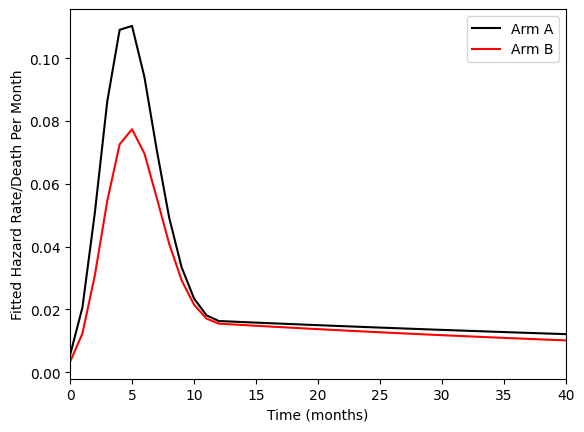

In [61]:
# Question 1
df = pd.read_csv('https://hastie.su.domains/CASI_files/DATA/ncog.txt', sep=' ')
# Separate by which treatment arm the patient was in
df_A = df[df['arm'] == 'A']
df_B = df[df['arm'] == 'B']
nA = len(df_A)
nB = len(df_B)

# Based on the data set description on hastie.su.domains, t is the days till death/censoring
# Hence, we first process by removing the day/month/year columns
df_A = df_A.drop(columns=['day', 'month', 'year', 'arm'])
df_B = df_B.drop(columns=['day', 'month', 'year', 'arm'])

# Next, we sort the data by the time of death/censoring
df_A = df_A.sort_values(by='t') # Sort by time, by default, these are sorted in increasing order
df_B = df_B.sort_values(by='t') 

# Next, we convert these days to months and round up the nearest month  
df_A['t'] = np.ceil(df_A['t']/(365.25/12))
df_B['t'] = np.ceil(df_B['t']/(365.25/12))

# Change type to int for easier processing
df_A['t'] = df_A['t'].astype(int)
df_B['t'] = df_B['t'].astype(int)

# Next, we create a new column to represent that it is a censoring event
df_A['l'] = 1 - df_A['d']
df_B['l'] = 1 - df_B['d']

# Now, we do a sum of the l column and the d column binned in the t column and reset indices
df_A = df_A.groupby('t').agg({'l': 'sum', 'd': 'sum'}).reset_index()
df_B = df_B.groupby('t').agg({'l': 'sum', 'd': 'sum'}).reset_index()
# Now, we create a new column for the number of patients at risk
df_A['n'] = nA - np.cumsum(df_A['d'] + df_A['l']) 
df_B['n'] = nB - np.cumsum(df_B['d'] + df_B['l'])
df_A['n'] = df_A['n'].shift(1) # correct for which subtracts which
df_B['n'] = df_B['n'].shift(1)
df_A['n'].iloc[0] = nA
df_B['n'].iloc[0] = nB

# Next, we compute the hazard rate
df_A['h'] = df_A['d']/df_A['n']
df_B['h'] = df_B['d']/df_B['n']

# Last but not least, we fill up missing values of t with 0 and merge accordingly
df_A_full = pd.DataFrame({'t': range(0, df_A['t'].max() + 1)})
df_B_full = pd.DataFrame({'t': range(0, df_B['t'].max() + 1)})
df_A_full = pd.merge(df_A_full, df_A, on='t', how='left')
df_B_full = pd.merge(df_B_full, df_B, on='t', how='left')
df_A_full = df_A_full.fillna(0)
df_B_full = df_B_full.fillna(0)

# Check that this is consistent with Table 9.3
print(df_A_full)
#print(df_B_full)

# Before we proceed with regression, we need to compute the logit of the hazard rate
df_A_full['lambda'] = np.log(df_A_full['h']/(1 - df_A_full['h']))
df_B_full['lambda'] = np.log(df_B_full['h']/(1 - df_B_full['h']))
# Replace -inf with -5 for numerical stability
df_A_full['lambda'] = df_A_full['lambda'].replace(-np.inf, -5)
df_B_full['lambda'] = df_B_full['lambda'].replace(-np.inf, -5)

# Next, we pre-process the data for regression; lambda against some combinations of t
knot_val = 12
df_A_full['1'] = 1
df_A_full['(t-k)-^2'] = np.power(np.minimum(df_A_full['t'] - knot_val,0), 2)
df_A_full['(t-k)-^3'] = np.power(np.minimum(df_A_full['t'] - knot_val,0), 3)
df_B_full['1'] = 1
df_B_full['(t-k)-^2'] = np.power(np.minimum(df_B_full['t'] - knot_val,0), 2)
df_B_full['(t-k)-^3'] = np.power(np.minimum(df_B_full['t'] - knot_val,0), 3)

#print(df_A_full)
#print(df_A_full.head())

# Now that we are done, let's fit the function accordingly.
Xa = df_A_full[['1', 't', '(t-k)-^2', '(t-k)-^3']]
ya = df_A_full['lambda']
Xb = df_B_full[['1', 't', '(t-k)-^2', '(t-k)-^3']]
yb = df_B_full['lambda']
model_A = sm.OLS(ya, Xa).fit()
model_B = sm.OLS(yb, Xb).fit()
df_A_full['fitted_lambda'] = model_A.predict(Xa)
df_B_full['fitted_lambda'] = model_B.predict(Xb)
# Convert fitted_lambda back to hazard rate
df_A_full['fitted_h'] = np.exp(df_A_full['fitted_lambda'])/(1 + np.exp(df_A_full['fitted_lambda']))
df_B_full['fitted_h'] = np.exp(df_B_full['fitted_lambda'])/(1 + np.exp(df_B_full['fitted_lambda']))

# Last but not least, we plot the hazard rate against time
plt.plot(df_A_full['t'], df_A_full['fitted_h'], label='Arm A', color = "black")
plt.plot(df_B_full['t'], df_B_full['fitted_h'], label='Arm B', color = "red")
plt.xlabel("Time (months)")
plt.ylabel("Fitted Hazard Rate/Death Per Month")
plt.xlim(0, 40)
plt.legend()
plt.show()